In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

training linear model.....
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.4088   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.3024 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3176 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 0.3505 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.3372 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3057 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.3158
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3096 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8521 - loss: 0.3210 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.3296 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.3295 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━

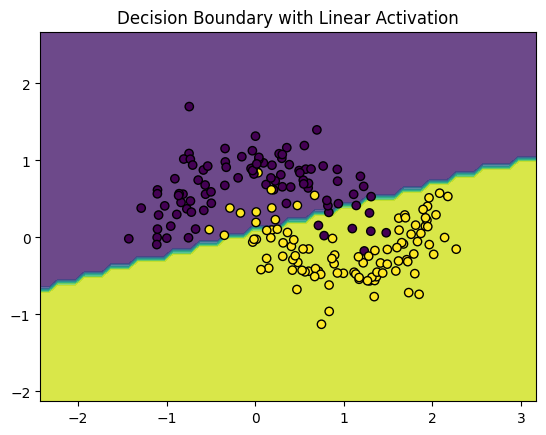

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


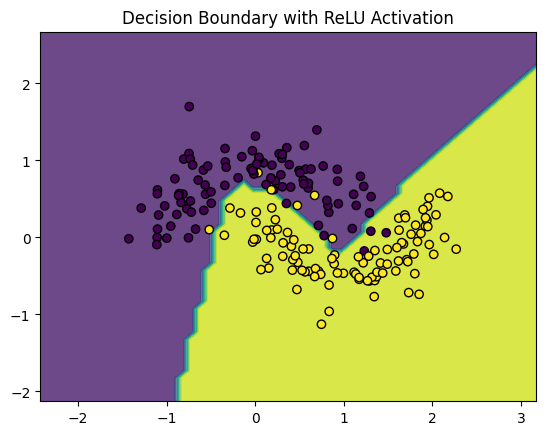

In [13]:
#synthetic dataset
X,y = make_moons(n_samples = 1000 , noise = 0.2 , random_state=1 )
y = y.reshape(-1,1) #reshape for consistency
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state=1)

from tensorflow.keras.layers import Input
def build_linear_model():
  model = Sequential([Input(shape=(2,)),Dense(4 , activation='linear'),Dense(1,activation = 'sigmoid')])
  model.compile(optimizer = Adam(learning_rate=0.2),loss = 'binary_crossentropy',metrics = ['accuracy'])
  return model

def build_ReLu_model():
  model = Sequential([Input(shape=(2,)),Dense(8 , activation='relu'),Dense(4 , activation='relu'),Dense(1,activation = 'sigmoid')]) # Added an extra hidden layer
  model.compile(optimizer = Adam(learning_rate=0.2),loss = 'binary_crossentropy',metrics = ['accuracy'])
  return model

def train_and_evalute(model,X_train,X_test,y_train,y_test,epochs = 50 ,batch_size = 32):
  model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose = True)
  y_pred = (model.predict(X_test) >0.5).astype(int)

  accuracy = accuracy_score(y_test,y_pred)
  return accuracy,y_pred

linear_model = build_linear_model()
relu_model = build_ReLu_model()

print("training linear model.....")
linear_accuracy,linear_preds = train_and_evalute(linear_model,X_train,X_test,y_train,y_test)

print(f'accuracy with the linear activation:  {linear_accuracy}')

print("training relu model.....")
relu_accuracy,relu_preds = train_and_evalute(relu_model,X_train,X_test,y_train,y_test)
print(f'accuracy with relu: {relu_accuracy}')

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = (Z > 0.5).astype(int).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k")
    plt.title(title)
    plt.show()

# Plot decision boundaries
print("\nVisualizing decision boundaries...")
plot_decision_boundary(linear_model, X_test, y_test, "Decision Boundary with Linear Activation")
plot_decision_boundary(relu_model, X_test, y_test, "Decision Boundary with ReLU Activation")

